## Импорт библиотек

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задаю стиль

In [26]:
sns.set_theme(style='whitegrid', palette='magma')

## Чтение и первичная обработка данных

In [6]:
data = pd.read_csv('train.csv')

In [7]:
rows, columns = data.shape
print(f'Count of rows: {rows}')
print(f'Count of columns: {columns}')

Count of rows: 103904
Count of columns: 25


In [8]:
print(data.dtypes)

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [9]:
print(data.describe())

          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000

In [10]:
print(data.columns.tolist())

['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction']


In [11]:
print(data.isna().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [12]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(0)
data = data.drop('Unnamed: 0', axis = 1)

## Доли довольных и недовольных пассажиров

In [14]:
df_satis_dur = data.groupby('satisfaction')['id'].sum()
df_total = df_satis_dur.sum()
shares_by_satis = round(((df_satis_dur / df_total) * 100), 2)

shares_by_satis = shares_by_satis.reset_index()
shares_by_satis.columns = ['Satisfaction', 'Percentage']

print(shares_by_satis)

              Satisfaction  Percentage
0  neutral or dissatisfied       56.27
1                satisfied       43.73


### Построение Barplot

C:\Users\casda\AppData\Local\Temp\ipykernel_11552\510907134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=shares_by_satis, x='Satisfaction', y='Percentage', palette='magma')


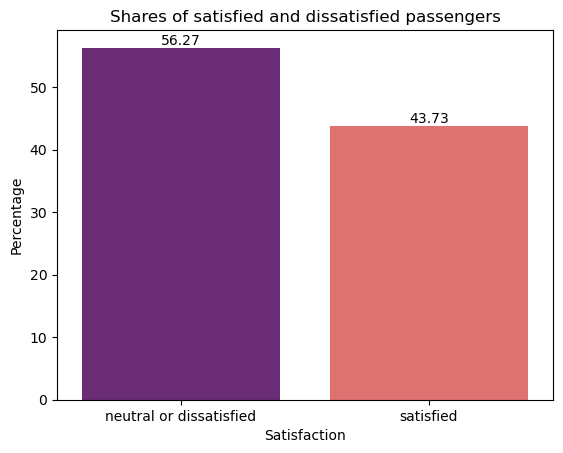

In [15]:
ax = sns.barplot(data=shares_by_satis, x='Satisfaction', y='Percentage', palette='magma')
for container in ax.containers:
     ax.bar_label(container)
plt.xlabel('Satisfaction')
plt.ylabel('Percentage')
plt.title('Shares of satisfied and dissatisfied passengers')
plt.show()

## Средние оценки, основанные на каждом из классов

In [16]:
service_columns = [
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

df_mean_scores = data.groupby('satisfaction')[service_columns].mean().round(2).T
df_mean_scores.columns = ['dissatisfied', 'satisfied']
df_mean_scores['diff'] = df_mean_scores['satisfied'] - df_mean_scores['dissatisfied']
df_mean_scores = df_mean_scores.sort_values(by='satisfied', ascending=False)

print(df_mean_scores)

                                   dissatisfied  satisfied  diff
Online boarding                            2.66       4.03  1.37
Seat comfort                               3.04       3.97  0.93
Baggage handling                           3.38       3.97  0.59
Inflight service                           3.39       3.97  0.58
Inflight entertainment                     2.89       3.96  1.07
On-board service                           3.02       3.86  0.84
Leg room service                           2.99       3.82  0.83
Cleanliness                                2.94       3.74  0.80
Checkin service                            3.04       3.65  0.61
Food and drink                             2.96       3.52  0.56
Inflight wifi service                      2.40       3.16  0.76
Ease of Online booking                     2.55       3.03  0.48
Gate location                              2.98       2.98  0.00
Departure/Arrival time convenient          3.13       2.97 -0.16


### Построение Heatmap

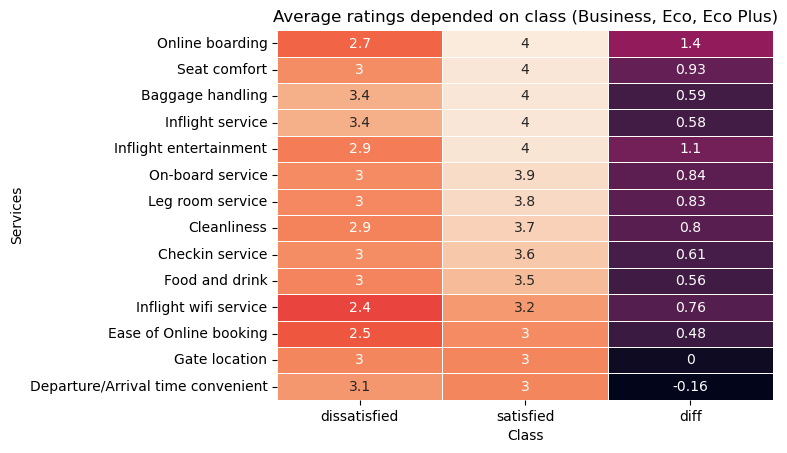

In [17]:
ax1 = sns.heatmap(data=df_mean_scores,
                  annot=True,
                  cbar=False,
                  linewidths=0.5
                  )
plt.title('Average ratings depended on class (Business, Eco, Eco Plus)')
plt.xlabel('Class')
plt.ylabel('Services')
plt.show()


## Средние оценки обслуживания в зависимости от типа клиента

In [21]:
loyalty_satisfaction = data.groupby(['Customer Type', 'satisfaction']).size().unstack()
loyalty_satisfaction_pct = round(((loyalty_satisfaction / loyalty_satisfaction.sum()) * 100), 2)

print(loyalty_satisfaction_pct)

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       75.39      90.02
disloyal Customer                    24.61       9.98


In [20]:
loyalty_services = data.groupby('Customer Type')[service_columns].mean().round(2)

print(loyalty_services)

                   Inflight wifi service  Departure/Arrival time convenient  \
Customer Type                                                                 
Loyal Customer                      2.73                               3.21   
disloyal Customer                   2.71                               2.39   

                   Ease of Online booking  Gate location  Food and drink  \
Customer Type                                                              
Loyal Customer                       2.77           2.97            3.24   
disloyal Customer                    2.70           2.99            3.03   

                   Online boarding  Seat comfort  Inflight entertainment  \
Customer Type                                                              
Loyal Customer                3.37          3.54                    3.43   
disloyal Customer             2.71          2.99                    3.05   

                   On-board service  Leg room service  Baggage handling  

### Построение графика

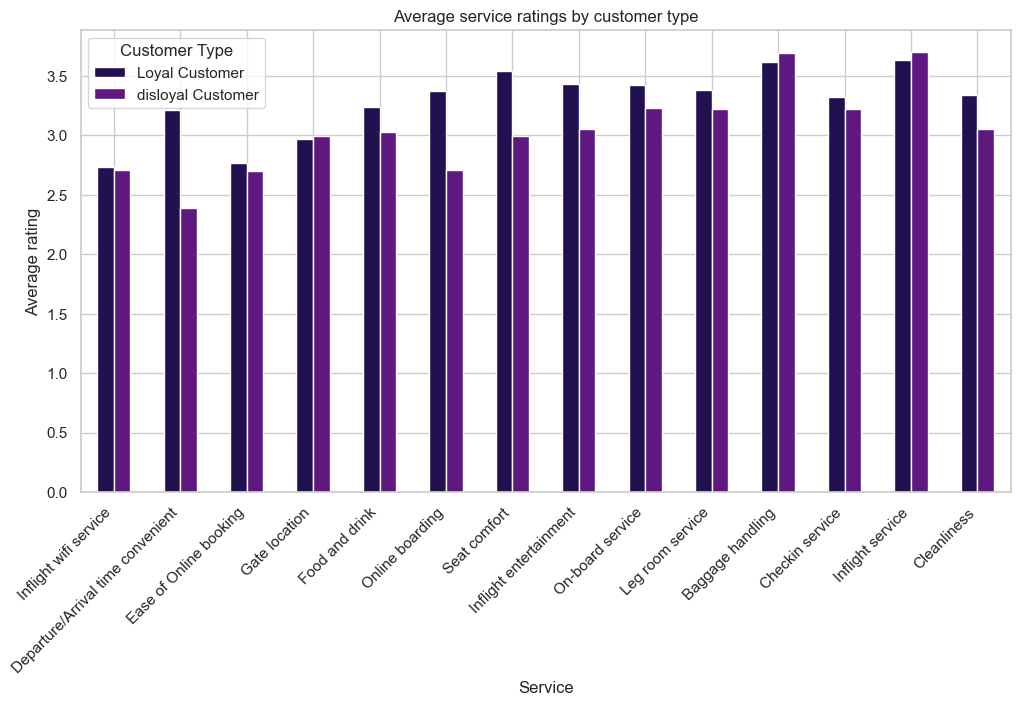

In [27]:
ax3 = loyalty_services.T.plot(kind='bar', figsize=(12, 6))
plt.title('Average service ratings by customer type')
plt.xlabel('Service')
plt.ylabel('Average rating')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type')
plt.show()